In [2]:
#Project 1, Part 2
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [68]:
#Define Prescribed Temperatures
T_t = 500
T_b = 850

In [69]:
#Define Dimensions
w = 0.1
l = 0.1

In [70]:
#Define the number of x & y divisions
xdiv = 4
ydiv = 4
#Define linear spaces for x and y
x = np.linspace(0,l,xdiv)
y = np.linspace(0,w,ydiv)

In [89]:
#Make an empty coefficient matrix
A = np.zeros(shape=(xdiv*ydiv, xdiv*ydiv))
#Make an empty vector
B = np.zeros(shape=(xdiv*ydiv, 1))

In [103]:
indices = []
for i in range(xdiv*ydiv):
    indices.append(i+1)
#Assign values to the empty matrix and vector for each node
#Checks for an edge condition, where the value is directly assigned
#If not, applies the finite difference method, eqn. 4.29
for i in indices:
    if i<= xdiv:
        A[i-1,i-1]=1
        B[i-1]=T_t
    elif i>=((xdiv*ydiv)-(xdiv)+1):
        A[i-1,i-1]=1
        B[i-1]=T_b
    elif i%xdiv == 0:
        A[i-1,i-1]=1
        B[i-1]=T_b
    elif (i-1)%xdiv == 0:
        A[i-1,i-1]=1
        B[i-1]=T_b
    else:
        B[i-1]=0
        A[i-1,i-1]=4
        A[i-1,i]=-1
        A[i-1,i-2]=-1
        A[i-1,i+xdiv-1]=-1
        A[i-1,i-xdiv-1]=-1

In [104]:
#Find the vector C such that AC=B
C = np.linalg.solve(A,B)
#Rearrange into a 4x4 matrix
D = np.resize(C,(4,4))
#Flip the matrix to the correct orientation
D = np.flipud(D)
print(D)

[[850.   850.   850.   850.  ]
 [850.   806.25 806.25 850.  ]
 [850.   718.75 718.75 850.  ]
 [500.   500.   500.   500.  ]]


Text(0.5, 1.0, '4 x 4 Grid FDM Solution')

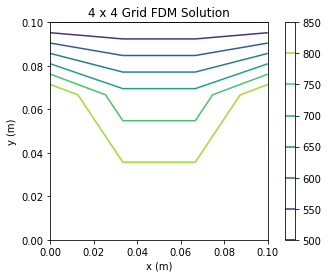

In [105]:
#Make a 2D Contour Plot
plt.contour(x,y,D)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title('4 x 4 Grid FDM Solution')